In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [251]:
gold_df = pd.read_csv('gold_spot_prices.csv')
stock_df = pd.read_csv('stock_data.csv')

In [253]:
gold_df.head()

,Symbol,QuotationValue,UpdatedDate,Session1SpotPrice,Session2SpotPrice,PolledInfo
0,GOLDM,10 Grams,12-10-2018,"31,564.00","31,546.00",https://nsearchives.nseindia.com/archives/com/...
1,SILVERMIC,1 Kg,12-10-2018,"38,258.00","38,263.00",https://nsearchives.nseindia.com/archives/com/...
2,SILVER,1 Kg,12-10-2018,"38,258.00","38,263.00",https://nsearchives.nseindia.com/archives/com/...
3,GOLD,10 Grams,12-10-2018,"31,564.00","31,546.00",https://nsearchives.nseindia.com/archives/com/...
4,SILVERM,1 Kg,12-10-2018,"38,258.00","38,263.00",https://nsearchives.nseindia.com/archives/com/...


In [255]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Company Name,"Market capitalization as on March 28, 2024\n(In lakhs)"
0,2024-07-30,3034.05,3050.00,3020.00,3026.30,3026.30,4110291.0,RELIANCE,Reliance Industries Limited,2.010560e+08
1,2024-07-29,3023.90,3055.00,3023.55,3040.20,3040.20,3769275.0,RELIANCE,Reliance Industries Limited,2.010560e+08
2,2024-07-26,2984.80,3024.85,2980.70,3018.05,3018.05,4929970.0,RELIANCE,Reliance Industries Limited,2.010560e+08
3,2024-07-25,2962.00,3000.95,2954.15,2984.80,2984.80,6259938.0,RELIANCE,Reliance Industries Limited,2.010560e+08
4,2024-07-24,2970.00,3019.00,2952.80,2991.40,2991.40,5956681.0,RELIANCE,Reliance Industries Limited,2.010560e+08


In [257]:
gold_df.shape, stock_df.shape

((19635, 6), (7482187, 10))

In [259]:
gold_df['Symbol'].value_counts().head()

Symbol
GOLDM        1728
GOLD         1728
SILVER       1727
SILVERM      1727
SILVERMIC    1727
Name: count, dtype: int64

In [261]:
gold_df = gold_df[gold_df['Symbol'] == 'GOLD'].copy()

In [263]:
gold_df.head(), gold_df.shape

(   Symbol QuotationValue UpdatedDate Session1SpotPrice Session2SpotPrice  \
 3    GOLD       10 Grams  12-10-2018         31,564.00         31,546.00   
 6    GOLD       10 Grams  15-10-2018         31,786.00         31,948.00   
 10   GOLD       10 Grams  16-10-2018         31,866.00         31,800.00   
 18   GOLD       10 Grams  17-10-2018         31,620.00         31,741.00   
 21   GOLD       10 Grams  19-10-2018         31,741.00         31,737.00   
 
                                            PolledInfo  
 3   https://nsearchives.nseindia.com/archives/com/...  
 6   https://nsearchives.nseindia.com/archives/com/...  
 10  https://nsearchives.nseindia.com/archives/com/...  
 18  https://nsearchives.nseindia.com/archives/com/...  
 21  https://nsearchives.nseindia.com/archives/com/...  ,
 (1728, 6))

In [265]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1728 entries, 3 to 19615
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Symbol             1728 non-null   object
 1   QuotationValue     1728 non-null   object
 2   UpdatedDate        1728 non-null   object
 3   Session1SpotPrice  1728 non-null   object
 4   Session2SpotPrice  1728 non-null   object
 5   PolledInfo         1728 non-null   object
dtypes: object(6)
memory usage: 94.5+ KB


In [267]:
gold_df['UpdatedDate'] = pd.to_datetime(gold_df['UpdatedDate'], format='%d-%m-%Y')

In [269]:
gold_start = gold_df['UpdatedDate'].min()
gold_end = gold_df['UpdatedDate'].max()
gold_start, gold_end

(Timestamp('2018-10-12 00:00:00'), Timestamp('2025-12-11 00:00:00'))

In [271]:
gold_df['Close'] = (gold_df['Session2SpotPrice'].str.replace(',','').replace('-',np.nan).astype(float))

In [273]:
gold_df.describe()

,UpdatedDate,Close
count,1728,1724.000000
mean,2022-06-03 12:19:10,56436.863689
min,2018-10-12 00:00:00,30259.000000
25%,2020-09-15 18:00:00,44649.250000
50%,2022-06-15 12:00:00,49523.500000
75%,2024-03-15 18:00:00,65465.000000
max,2025-12-11 00:00:00,129927.000000
std,NaN,21144.965222


In [275]:
gold_df.isnull().sum()

Symbol               0
QuotationValue       0
UpdatedDate          0
Session1SpotPrice    0
Session2SpotPrice    0
PolledInfo           0
Close                4
dtype: int64

In [277]:
gold_df = gold_df.dropna(subset=['Close']) # Remove Missing Values

In [279]:
gold_df = gold_df.sort_values('UpdatedDate').reset_index(drop=True)

In [281]:
gold_df

,Symbol,QuotationValue,UpdatedDate,Session1SpotPrice,Session2SpotPrice,PolledInfo,Close
0,GOLD,10 Grams,2018-10-12,"31,564.00","31,546.00",https://nsearchives.nseindia.com/archives/com/...,31546.0
1,GOLD,10 Grams,2018-10-15,"31,786.00","31,948.00",https://nsearchives.nseindia.com/archives/com/...,31948.0
2,GOLD,10 Grams,2018-10-16,"31,866.00","31,800.00",https://nsearchives.nseindia.com/archives/com/...,31800.0
3,GOLD,10 Grams,2018-10-17,"31,620.00","31,741.00",https://nsearchives.nseindia.com/archives/com/...,31741.0
4,GOLD,10 Grams,2018-10-19,"31,741.00","31,737.00",https://nsearchives.nseindia.com/archives/com/...,31737.0
...,...,...,...,...,...,...,...
1719,GOLD,10 Grams,2025-12-05,"94,149.00","92,658.00",https://nsearchives.nseindia.com/archives/com/...,92658.0
1720,GOLD,10 Grams,2025-12-06,"96,815.00","96,921.00",https://nsearchives.nseindia.com/archives/com/...,96921.0
1721,GOLD,10 Grams,2025-12-08,"99,159.00","99,375.00",https://nsearchives.nseindia.com/archives/com/...,99375.0
1722,GOLD,10 Grams,2025-12-09,"1,09,446.00","1,09,411.00",https://nsearchives.nseindia.com/archives/com/...,109411.0


In [283]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7482187 entries, 0 to 7482186
Data columns (total 10 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   Date                                                   object 
 1   Open                                                   float64
 2   High                                                   float64
 3   Low                                                    float64
 4   Close                                                  float64
 5   Adj Close                                              float64
 6   Volume                                                 float64
 7   Symbol                                                 object 
 8   Company Name                                           object 
 9   Market capitalization as on March 28, 2024
(In lakhs)  float64
dtypes: float64(7), object(3)
memory usage: 570.8+ MB


In [289]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [291]:
stock_start = stock_df['Date'].min()
stock_end = stock_df['Date'].max()
stock_start, stock_end

(Timestamp('2002-08-12 00:00:00'), Timestamp('2025-11-28 00:00:00'))

In [293]:
common_start = max(gold_start, stock_start)
common_end = min(gold_end, stock_end)
common_start, common_end

(Timestamp('2018-10-12 00:00:00'), Timestamp('2025-11-28 00:00:00'))

In [295]:
stock_df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,"Market capitalization as on March 28, 2024\n(In lakhs)"
count,7482187,7.482187e+06,7.482187e+06,7.482187e+06,7.482187e+06,7.482187e+06,7.189470e+06,6.711349e+06
mean,2016-09-03 19:11:20.258379520,1.755024e+04,1.817849e+04,1.690024e+04,1.746621e+04,1.742731e+04,7.487642e+06,2.463207e+06
min,2002-08-12 00:00:00,3.680000e-04,3.680000e-04,3.680000e-04,3.680000e-04,-1.300000e-01,0.000000e+00,4.486083e+02
25%,2011-09-27 00:00:00,1.806000e+01,1.852861e+01,1.760000e+01,1.800000e+01,1.629000e+01,1.383400e+04,4.387727e+04
50%,2017-09-18 00:00:00,7.125000e+01,7.290000e+01,6.955000e+01,7.100000e+01,6.454100e+01,8.608975e+04,1.727763e+05
75%,2022-02-28 00:00:00,2.648000e+02,2.700000e+02,2.590500e+02,2.639500e+02,2.460400e+02,5.695590e+05,1.027552e+06
max,2025-11-28 00:00:00,6.740000e+08,7.350000e+08,6.321000e+08,6.750000e+08,6.750000e+08,1.639026e+12,2.010560e+08
std,NaN,2.072605e+06,2.155686e+06,1.988702e+06,2.065045e+06,2.064480e+06,1.065770e+09,1.010493e+07


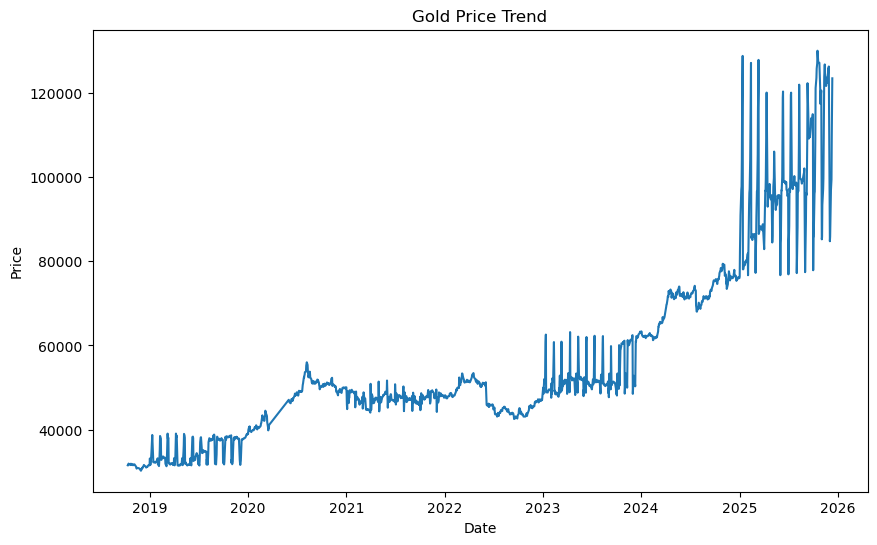

In [297]:
plt.figure(figsize=(10,6))
plt.plot(gold_df['UpdatedDate'], gold_df['Close'])
plt.title("Gold Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [299]:
gold_df['Gold_Return'] = gold_df['Close'].pct_change()

In [301]:
gold_df['Gold_Return']

0            NaN
1       0.012743
2      -0.004633
3      -0.001855
4      -0.000126
          ...   
1719    0.079817
1720    0.046008
1721    0.025320
1722    0.100991
1723    0.127656
Name: Gold_Return, Length: 1724, dtype: float64

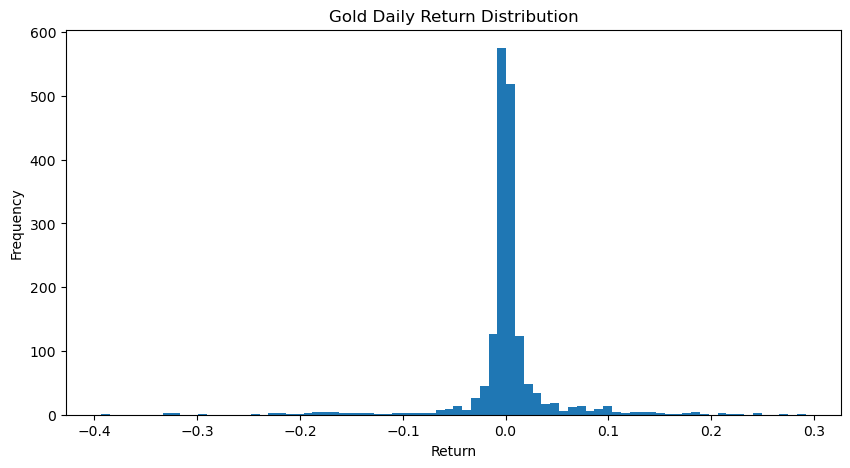

In [303]:
plt.figure(figsize=(10,5))
plt.hist(gold_df['Gold_Return'].dropna(), bins=80)
plt.title("Gold Daily Return Distribution")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.show()

In [305]:
gold_df['Year'] = gold_df['UpdatedDate'].dt.year

In [307]:
gold_df

,Symbol,QuotationValue,UpdatedDate,Session1SpotPrice,Session2SpotPrice,PolledInfo,Close,Gold_Return,Year
0,GOLD,10 Grams,2018-10-12,"31,564.00","31,546.00",https://nsearchives.nseindia.com/archives/com/...,31546.0,NaN,2018
1,GOLD,10 Grams,2018-10-15,"31,786.00","31,948.00",https://nsearchives.nseindia.com/archives/com/...,31948.0,0.012743,2018
2,GOLD,10 Grams,2018-10-16,"31,866.00","31,800.00",https://nsearchives.nseindia.com/archives/com/...,31800.0,-0.004633,2018
3,GOLD,10 Grams,2018-10-17,"31,620.00","31,741.00",https://nsearchives.nseindia.com/archives/com/...,31741.0,-0.001855,2018
4,GOLD,10 Grams,2018-10-19,"31,741.00","31,737.00",https://nsearchives.nseindia.com/archives/com/...,31737.0,-0.000126,2018
...,...,...,...,...,...,...,...,...,...
1719,GOLD,10 Grams,2025-12-05,"94,149.00","92,658.00",https://nsearchives.nseindia.com/archives/com/...,92658.0,0.079817,2025
1720,GOLD,10 Grams,2025-12-06,"96,815.00","96,921.00",https://nsearchives.nseindia.com/archives/com/...,96921.0,0.046008,2025
1721,GOLD,10 Grams,2025-12-08,"99,159.00","99,375.00",https://nsearchives.nseindia.com/archives/com/...,99375.0,0.025320,2025
1722,GOLD,10 Grams,2025-12-09,"1,09,446.00","1,09,411.00",https://nsearchives.nseindia.com/archives/com/...,109411.0,0.100991,2025


### 2. Gold Extreme Thresholds (95% & 5%)

In [310]:
gold_thresholds = []

for y in sorted(gold_df['Year'].unique()):
    temp = gold_df[gold_df['Year'] <= y]['Gold_Return'].dropna()
    
    gold_thresholds.append({
        'Year': y,
        'Top_Gold_95': np.percentile(temp, 95),
        'Bottom_Gold_5': np.percentile(temp, 5)
    })

threshold_df = pd.DataFrame(gold_thresholds)
threshold_df.head()

,Year,Top_Gold_95,Bottom_Gold_5
0,2018,0.011530,-0.007652
1,2019,0.072376,-0.041124
2,2020,0.049210,-0.026102
3,2021,0.047027,-0.034211
4,2022,0.040077,-0.028756


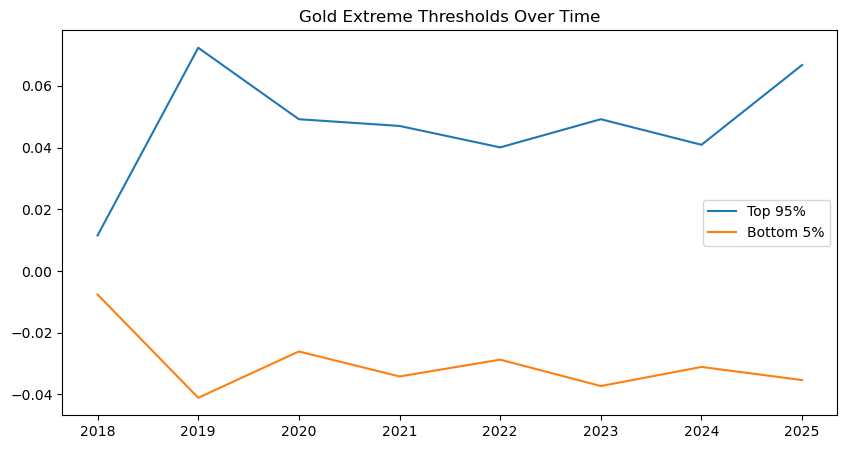

In [312]:
plt.figure(figsize=(10,5))
plt.plot(threshold_df['Year'], threshold_df['Top_Gold_95'], label='Top 95%')
plt.plot(threshold_df['Year'], threshold_df['Bottom_Gold_5'], label='Bottom 5%')
plt.legend()
plt.title("Gold Extreme Thresholds Over Time")
plt.show()

### 3. Previous Day Gold Extreme Classification

In [315]:
# Merge the gold_df and threshold_df
gold_df = gold_df.merge(threshold_df, on='Year', how='left')

In [317]:
gold_df['Prev_Gold_Return'] = gold_df['Gold_Return'].shift(1)
gold_df['Prev_Gold_Year'] = gold_df['Year'] - 1

In [319]:
gold_df.head()

,Symbol,QuotationValue,UpdatedDate,Session1SpotPrice,Session2SpotPrice,PolledInfo,Close,Gold_Return,Year,Top_Gold_95,Bottom_Gold_5,Prev_Gold_Return,Prev_Gold_Year
0,GOLD,10 Grams,2018-10-12,"31,564.00","31,546.00",https://nsearchives.nseindia.com/archives/com/...,31546.0,NaN,2018,0.01153,-0.007652,NaN,2017
1,GOLD,10 Grams,2018-10-15,"31,786.00","31,948.00",https://nsearchives.nseindia.com/archives/com/...,31948.0,0.012743,2018,0.01153,-0.007652,NaN,2017
2,GOLD,10 Grams,2018-10-16,"31,866.00","31,800.00",https://nsearchives.nseindia.com/archives/com/...,31800.0,-0.004633,2018,0.01153,-0.007652,0.012743,2017
3,GOLD,10 Grams,2018-10-17,"31,620.00","31,741.00",https://nsearchives.nseindia.com/archives/com/...,31741.0,-0.001855,2018,0.01153,-0.007652,-0.004633,2017
4,GOLD,10 Grams,2018-10-19,"31,741.00","31,737.00",https://nsearchives.nseindia.com/archives/com/...,31737.0,-0.000126,2018,0.01153,-0.007652,-0.001855,2017


In [321]:
def classify_prev_gold(row):
    prev_year = row['Prev_Gold_Year']
    prev_ret = row['Prev_Gold_Return']
    
    thresh = threshold_df[threshold_df['Year'] == prev_year]
    
    if thresh.empty or pd.isna(prev_ret):
        return 'No_Event'
    
    if prev_ret >= thresh['Top_Gold_95'].values[0]:
        return 'Top_Gold'
    elif prev_ret <= thresh['Bottom_Gold_5'].values[0]:
        return 'Bottom_Gold'
    else:
        return 'Normal'

In [323]:
# For the exact next day
gold_df['Prev_Day_Gold_Event'] = gold_df.apply(classify_prev_gold, axis=1)

In [324]:
gold_df['Prev_Day_Gold_Event']

0       No_Event
1       No_Event
2       No_Event
3       No_Event
4       No_Event
          ...   
1719      Normal
1720    Top_Gold
1721    Top_Gold
1722      Normal
1723    Top_Gold
Name: Prev_Day_Gold_Event, Length: 1724, dtype: object

In [327]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Company Name,"Market capitalization as on March 28, 2024\n(In lakhs)"
0,2024-07-30,3034.05,3050.00,3020.00,3026.30,3026.30,4110291.0,RELIANCE,Reliance Industries Limited,2.010560e+08
1,2024-07-29,3023.90,3055.00,3023.55,3040.20,3040.20,3769275.0,RELIANCE,Reliance Industries Limited,2.010560e+08
2,2024-07-26,2984.80,3024.85,2980.70,3018.05,3018.05,4929970.0,RELIANCE,Reliance Industries Limited,2.010560e+08
3,2024-07-25,2962.00,3000.95,2954.15,2984.80,2984.80,6259938.0,RELIANCE,Reliance Industries Limited,2.010560e+08
4,2024-07-24,2970.00,3019.00,2952.80,2991.40,2991.40,5956681.0,RELIANCE,Reliance Industries Limited,2.010560e+08


### 4. Intraday Stock Return

In [330]:
stock_df['Intraday_Return'] = (stock_df['Close'] - stock_df['Open']) / stock_df['Open']

In [332]:
stock_df['Intraday_Return']

0         -0.002554
1          0.005390
2          0.011140
3          0.007698
4          0.007205
             ...   
7482182    0.000000
7482183   -0.025438
7482184    0.022273
7482185   -0.011928
7482186   -0.012729
Name: Intraday_Return, Length: 7482187, dtype: float64

### 5. Average Stock Reaction After Gold Events

In [335]:
merged_df = stock_df.merge(
    gold_df[['UpdatedDate','Prev_Day_Gold_Event','Year']],
    left_on='Date',
    right_on='UpdatedDate',
    how='inner'
)

In [336]:
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Company Name,"Market capitalization as on March 28, 2024\n(In lakhs)",Intraday_Return,UpdatedDate,Prev_Day_Gold_Event,Year
0,2024-07-30,3034.05,3050.00,3020.00,3026.30,3026.30,4110291.0,RELIANCE,Reliance Industries Limited,2.010560e+08,-0.002554,2024-07-30,Normal,2024
1,2024-07-29,3023.90,3055.00,3023.55,3040.20,3040.20,3769275.0,RELIANCE,Reliance Industries Limited,2.010560e+08,0.005390,2024-07-29,Normal,2024
2,2024-07-26,2984.80,3024.85,2980.70,3018.05,3018.05,4929970.0,RELIANCE,Reliance Industries Limited,2.010560e+08,0.011140,2024-07-26,Normal,2024
3,2024-07-25,2962.00,3000.95,2954.15,2984.80,2984.80,6259938.0,RELIANCE,Reliance Industries Limited,2.010560e+08,0.007698,2024-07-25,Normal,2024
4,2024-07-24,2970.00,3019.00,2952.80,2991.40,2991.40,5956681.0,RELIANCE,Reliance Industries Limited,2.010560e+08,0.007205,2024-07-24,Bottom_Gold,2024


### 6. Identifying Top Performing Companies

In [340]:
avg_returns = (
    merged_df
    .groupby(['Year','Symbol','Prev_Day_Gold_Event'])
    ['Intraday_Return']
    .mean()
    .reset_index()
)

In [342]:
avg_returns.head()

,Year,Symbol,Prev_Day_Gold_Event,Intraday_Return
0,2018,20MICRONS,No_Event,-0.006029
1,2018,21STCENMGM,No_Event,-0.002191
2,2018,3IINFOLTD,No_Event,-0.005557
3,2018,3MINDIA,No_Event,-0.003246
4,2018,3PLAND,No_Event,0.006685


In [344]:
top_gold_avg = avg_returns[avg_returns['Prev_Day_Gold_Event']=='Top_Gold']

summary = top_gold_avg.groupby('Year')['Intraday_Return'].describe()
summary

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2019,1569.0,-0.003339,0.008263,-0.047660,-0.007307,-0.003132,0.000034,0.114286
2020,1582.0,0.011125,0.037295,-0.170948,-0.006807,0.000000,0.025516,0.500000
2021,1694.0,-0.005621,0.014604,-0.075033,-0.014020,-0.006265,0.001439,0.095214
2022,1743.0,0.021414,0.032433,-0.094862,0.000000,0.019206,0.039994,0.189655
2023,1931.0,-0.003071,0.006652,-0.037720,-0.006637,-0.002893,0.000614,0.031245
2025,1368.0,-0.001871,0.005162,-0.026684,-0.004860,-0.001372,0.001066,0.017034


### 7. Listing Top Companies by Percentiles

In [347]:
percentiles = [0.95, 0.96, 0.97, 0.98, 0.99]

cutoffs = (
    top_gold_avg
    .groupby('Year')['Intraday_Return']
    .quantile(percentiles)
    .unstack()
)
cutoffs

,0.95,0.96,0.97,0.98,0.99
Year,,,,,
2019,0.006699,0.007401,0.009250,0.011374,0.017962
2020,0.069760,0.079054,0.088286,0.100333,0.157928
2021,0.018463,0.020050,0.022656,0.030631,0.039414
2022,0.078551,0.084140,0.089937,0.094117,0.104679
2023,0.006798,0.007602,0.009014,0.011344,0.015714
2025,0.006278,0.006751,0.007603,0.008284,0.010597


In [349]:
result = {}

for year in cutoffs.index:
    year_data = top_gold_avg[top_gold_avg['Year']==year]
    result[year] = {}
    
    for p in cutoffs.columns:
        result[year][f"Top_{int((1-p)*100)}%"] = list(
            year_data[year_data['Intraday_Return'] >= cutoffs.loc[year,p]]['Symbol']
        )

In [351]:
result

{2019: {'Top_5%': ['AAVAS',
   'AGROPHOS',
   'AIROLAM',
   'AJOONI',
   'ANKITMETAL',
   'ANTGRAPHIC',
   'BASML',
   'BFUTILITIE',
   'BVCL',
   'CHEMBOND',
   'CONSOFINVT',
   'DCMNVL',
   'DGCONTENT',
   'DISHTV',
   'DNAMEDIA',
   'EIFFL',
   'EQUIPPP',
   'FLUOROCHEM',
   'GANGESSECU',
   'GAYAHWS',
   'GOENKA',
   'GREENPANEL',
   'GREENPLY',
   'GUJRAFFIA',
   'HAVISHA',
   'HBSL',
   'IMPEXFERRO',
   'INDIANCARD',
   'JASH',
   'JAYNECOIND',
   'JETAIRWAYS',
   'JPOLYINVST',
   'KANANIIND',
   'KAUSHALYA',
   'KEYFINSERV',
   'KHANDSE',
   'LGBFORGE',
   'MAHAPEXLTD',
   'METROPOLIS',
   'MITTAL',
   'MOKSH',
   'MSTCLTD',
   'NBIFIN',
   'ONELIFECAP',
   'PALASHSECU',
   'PAR',
   'PCJEWELLER',
   'PKTEA',
   'PPL',
   'PRAENG',
   'PRICOLLTD',
   'PRIMESECU',
   'QUINTEGRA',
   'RAJTV',
   'SAFARI',
   'SAGARDEEP',
   'SALONA',
   'SARVESHWAR',
   'SEQUENT',
   'SGL',
   'SIRCA',
   'SPANDANA',
   'SPCENET',
   'SPYL',
   'SUBEXLTD',
   'SUPREMEENG',
   'SURANAT&P',
   'SUUL